## A simple Project For Ploynomial Regression

### Import necessary Liberaries

In [87]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import random as rnd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
%matplotlib inline 
import matplotlib.pyplot as plt

### Extract the data from website

In [88]:
df = pd.read_html('https://en.wikipedia.org/wiki/Vodafone')
df[7]

,Year ended 31 March,Turnover €m,Profit before tax €m,Profit for the year €m,Basic eps (pence)
0,2020,44974,795,(455),(16.25)
1,2019,43666,"(2,613)","(7,644)",(3.13)
2,2018,46571,3878,2788,15.87
3,2017,47631,2792,"(6,079)",(7.83)
4,2016,49810,(190),"(5,122)",(20.27)
5,2015,48385,1734,7477,28.72


### Save the data to CSV file

In [77]:
df[7].to_csv('Downloads/Voda.csv')

In [321]:
voda_df = pd.read_csv('Downloads/Voda.csv')
voda_df

,Unnamed: 0,Year_ended_March,Turnover,Profit before tax,Profit for the year,Basic eps
0,0,2020,44974,795,-455,-16.25
1,1,2019,43666,"-2,613","-7,644",-3.13
2,2,2018,46571,3878,2788,15.87
3,3,2017,47631,2792,"-6,079",-7.83
4,4,2016,49810,-190,"-5,122",-20.27
5,5,2015,48385,1734,7477,28.72


### Describe the data to be able for extracting the real prediction

In [323]:
voda_df.describe()

,Unnamed: 0,Year_ended_March,Turnover,Basic eps
count,6.000000,6.000000,6.000000,6.000000
mean,2.500000,2017.500000,46839.500000,-0.481667
std,1.870829,1.870829,2256.643414,19.085830
min,0.000000,2015.000000,43666.000000,-20.270000
25%,1.250000,2016.250000,45373.250000,-14.145000
50%,2.500000,2017.500000,47101.000000,-5.480000
75%,3.750000,2018.750000,48196.500000,11.120000
max,5.000000,2020.000000,49810.000000,28.720000


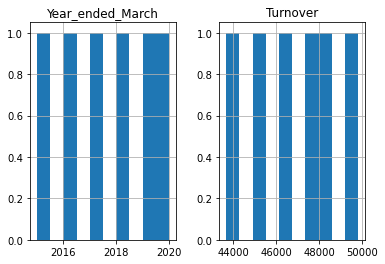

In [324]:
viz = voda_df[['Year_ended_March','Turnover']]
viz.hist()
plt.show()

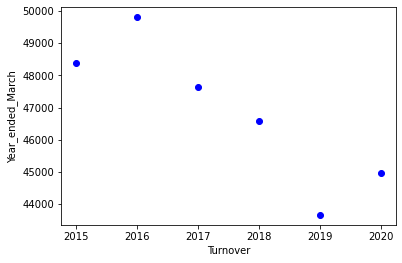

In [325]:
plt.scatter(voda_df.Year_ended_March, voda_df.Turnover,  color='blue')
plt.xlabel("Turnover")
plt.ylabel("Year_ended_March")
plt.show()

### Evaluate the model

In [326]:
x = voda_df['Turnover'].values
y = voda_df['Year_ended_March'].values

In [327]:
x = x.reshape(-1, 1)

In [328]:
poly = PolynomialFeatures(degree=10)

### Now we fit the model for Evaluation

In [329]:
x_poly = poly.fit_transform(x)

In [330]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=10)

In [331]:
linreg = LinearRegression()

In [332]:
linreg.fit(x_poly, y)

LinearRegression()

In [333]:
y_pred = linreg.predict(x_poly)

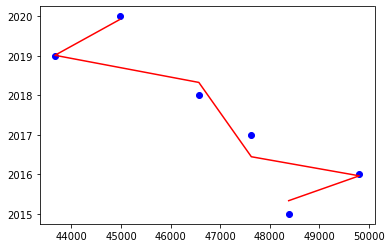

In [334]:
plt.scatter(x,y, color='blue')
plt.plot(x, y_pred, color='red')

In [335]:
df = pd.DataFrame(np.random.randn(6, 2))
msk = np.random.rand(len(df)) < 0.8
train = voda_df[msk]
test = voda_df[~msk]

### Make a prediction by using sklearn

In [336]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Turnover']])
train_y = np.asanyarray(train[['Year_ended_March']]) 
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00071767]]
Intercept:  [2051.11538623]


Text(0, 0.5, 'Year_ended_March')

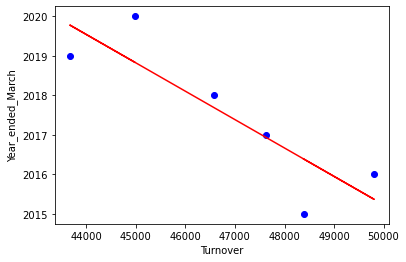

In [316]:
plt.scatter(train.Turnover, train.Year_ended_March,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Turnover")
plt.ylabel("Year_ended_March")